Q1. Consider the Bangalore House Price Data. Perform following
operations.
    a) Find and replace null values in the data using appropriate
    technique.
    b) Transform the ‘Size’ column to numerical values. For Example:
    2 BHK to be converted as 2
    c) Transform the ‘total_sqft’ column to contain numerical values
    on same scale. If the range is given average value of the range to
    be taken.
    d) Calculate and add one more column as ‘Price_Per_Sqft’
    e) Remove the outliers from Price_Per_Sqft and BHK Size column
    if any.
    f) Apply the Linear Regression model to the data and display the
    training and testing performance measures as Mean Squared Error
    and Accuracy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing the dataset

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Banglore Housing Prices.csv - Banglore Housing Prices.csv.csv")
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [3]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

The total_sqft column has string values so we have to convert them into integers and then extract these integers from the string. Then copy the data in a variable.

In [4]:
def extract_int(s):
    nums = []
    i = 0
    while s[i].isdigit():
        nums.append(s[i])
        i+=1
    return ''.join(nums)

def remove_sym(s):
    s = s.replace('.', '')
    return s.replace(' ', '')

sqft = df['total_sqft'].to_list()
new_sqft = []
for area in sqft:
    try:
        if '.' in area:
            num = area.split('.')
            new_sqft.append(int(num[0]))
            continue
        new_sqft.append(int(area))
    except:
        if remove_sym(area).isalnum():
            a = extract_int(area)
            new_sqft.append(int(a))
            continue
        n1, n2 = area.split(' - ')
        mean = (int(n1) + int(n2))/2
        new_sqft.append(int(mean))
df['total_sqft'] = new_sqft

Checking for missing values

In [5]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Extract the string values of size column

In [6]:
size = df['size'].to_list()
new_sizes = []
for s in size:
    try:
        num, string = s.split()
        new_sizes.append(int(num))
    except:
        pass
new_sizes = np.array(new_sizes)
median_rooms = int(np.median(new_sizes))

Replacing the NaN values with median

In [7]:
df['size'].replace(np.nan, f'{median_rooms} BHK', inplace=True)

In [8]:
df['bath'].replace(np.nan, df['bath'].median(skipna=True), inplace=True)

In [9]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df.isnull().sum()

location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Calulating the least favourite values

In [11]:
least_fav = df['location'].value_counts()
least_fav

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

Calculating the least frequent localities

In [12]:
least_fav = least_fav[least_fav <= 10]
least_fav

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [13]:
# remove those localities that occur less than 10 times
df['location'] = df['location'].apply(lambda x: 'other' if x in least_fav else x)

In [14]:
df['location'].value_counts()

other                 2885
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

Performing one-hot encoding for locations

In [15]:
encoded = pd.get_dummies(df['location'])
# concat attributes
df = pd.concat([df, encoded], axis = 1)
df

,location,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440,2.0,62.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2 BHK,1200,2.0,51.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,other,4 BHK,3600,5.0,400.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Value counts of size column

In [16]:
size = df['size'].to_list()

In [17]:
new_sizes = []
for s in size:
    num, string = s.split()
    new_sizes.append(int(num))
    
df['size'] = new_sizes

In [18]:
# calculating price per sqft
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']

Removing outliers for 'size'

In [19]:
def remove_size_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df = remove_size_outliers(df)

df.shape

(8442, 248)

In [20]:
# drop loaction as one hot encoding is now merged with our dataframe
df.drop(columns='location', inplace=True)

In [21]:
df.head()

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,price_per_sqft
0,2,1056,2.0,39.07,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3699.810606
2,3,1440,2.0,62.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4305.555556
3,3,1521,3.0,95.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6245.890861
4,2,1200,2.0,51.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4250.000000
6,4,2732,4.0,204.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7467.057101


Dropping price_per_sqft 

In [22]:
df.drop(columns='price_per_sqft', inplace=True)

Removing outliers for bathrooms

In [23]:
df = df[df.bath < df.size + 2]
df.shape

(8442, 246)

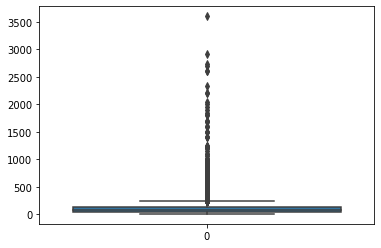

In [24]:
sns.boxplot(data=df['price'])

In [25]:
from sklearn.preprocessing import PowerTransformer

# using power transformer for removing outliers
transformer = PowerTransformer()
df['price'] = transformer.fit_transform(np.array(df['price']).reshape(-1,1))

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(x_train, y_train)
score = reg.score(x_test, y_test)
y_pred = reg.predict(x_test)
# r2_score
print('Test R2 Score', score)
print('Train R2 Score', reg.score(x_train, y_train))

Test R2 Score 0.9918915458241301
Train R2 Score 1.0


In [27]:
# mean_squared_error
from sklearn.metrics import mean_squared_error

error = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', error)

Mean Squared Error: 0.00039478878799842137
